# Predicting the Outcome of the 2016 USA Presidential Election

In [868]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "2016-general-election-trump-vs-clinton.csv"
df = pd.read_csv(file_path)
df


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,266.0,Registered Voters - independent,Internet,34.0,45.0,NaN,21.0,http://elections.huffingtonpost.com/pollster/p...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,NaN,NaN,1
1518,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,32.0,50.0,3.0,14.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1
1519,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,5.0,89.0,0.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1
1520,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,679.0,Registered Voters - Republican,Live Phone,68.0,9.0,4.0,19.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1


In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             88 non-null     

In [870]:
df = df.dropna(subset=["Number of Observations"])
df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,235.0,Registered Voters - Republican,Internet,65.0,12.0,NaN,24.0,http://elections.huffingtonpost.com/pollster/p...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,NaN,NaN,1
1517,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,266.0,Registered Voters - independent,Internet,34.0,45.0,NaN,21.0,http://elections.huffingtonpost.com/pollster/p...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,NaN,NaN,1
1518,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,32.0,50.0,3.0,14.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1
1519,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,5.0,89.0,0.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1


In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 0 to 1520
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1013 non-null   object 
 1   Start Date              1013 non-null   object 
 2   End Date                1013 non-null   object 
 3   Entry Date/Time (ET)    1013 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1013 non-null   object 
 6   Mode                    1013 non-null   object 
 7   Trump                   1013 non-null   float64
 8   Clinton                 1013 non-null   float64
 9   Other                   640 non-null    float64
 10  Undecided               979 non-null    float64
 11  Pollster URL            1013 non-null   object 
 12  Source URL              1013 non-null   object 
 13  Partisan                1013 non-null   object 
 14  Affiliation             44 non-null     objec

In [872]:
# Keep only nonpartisan polls
df_clean = df[df["Affiliation"].isna()]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 0 to 1520
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                969 non-null    object 
 1   Start Date              969 non-null    object 
 2   End Date                969 non-null    object 
 3   Entry Date/Time (ET)    969 non-null    object 
 4   Number of Observations  969 non-null    float64
 5   Population              969 non-null    object 
 6   Mode                    969 non-null    object 
 7   Trump                   969 non-null    float64
 8   Clinton                 969 non-null    float64
 9   Other                   625 non-null    float64
 10  Undecided               946 non-null    float64
 11  Pollster URL            969 non-null    object 
 12  Source URL              969 non-null    object 
 13  Partisan                969 non-null    object 
 14  Affiliation             0 non-null      object

In [873]:
total_voters = df_clean["Number of Observations"].sum()
p_hat = (df_clean["Clinton"] / 100 * df_clean["Number of Observations"]).sum() / total_voters

SE = np.sqrt((p_hat * (1 - p_hat)) / total_voters)

Z = stats.norm.ppf(0.975)  # Z-score for 95% confidence level
CI_lower = p_hat - Z * SE
CI_upper = p_hat + Z * SE

print(f"Estimated proportion (p-hat): {p_hat:.4f}")
print(f"Standard Error (SE): {SE:.6f}")
print(f"95% Confidence Interval: ({CI_lower:.4f}, {CI_upper:.4f})")


Estimated proportion (p-hat): 0.4553
Standard Error (SE): 0.000364
95% Confidence Interval: (0.4546, 0.4560)


### Q2. Suppose the true population proportion 𝑝 = 0.47. Perform a Monte Carlo simulation with 𝑁 = 30 and 10^5 iterations to show that the CI derived in Question 1 captures the true proportion p approximately 95% of the time

Proportion of CIs that capture the true p (0.47): 0.93 (Expected ~95%)


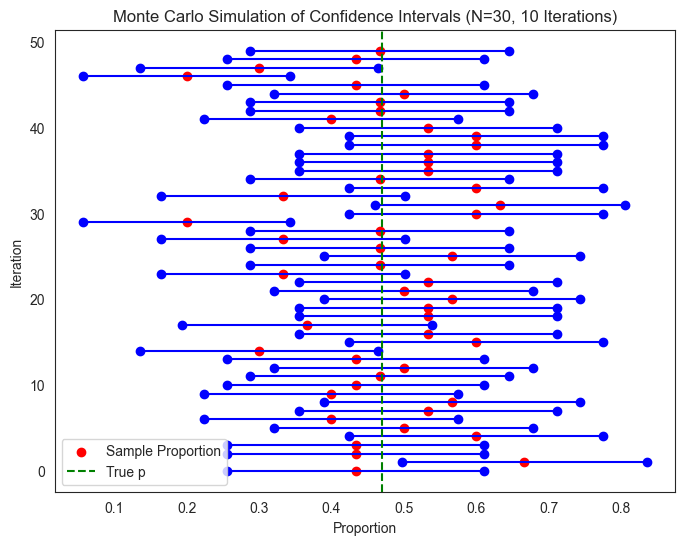

In [874]:
true_p = 0.47

N = 30
iterations = 100000
z_score = stats.norm.ppf(0.975)

captures_true_p = 0  
ci_intervals = []

for _ in range(iterations):

    sample = np.random.binomial(1, true_p, N)
    
    p_hat = np.mean(sample)
    se = np.sqrt((p_hat * (1 - p_hat)) / N)
    
    ci_lower = p_hat - z_score * se
    ci_upper = p_hat + z_score * se
    
    ci_intervals.append((ci_lower, ci_upper, p_hat))

    if ci_lower <= true_p and true_p <= ci_upper:
        captures_true_p += 1

capture_rate = captures_true_p / iterations

print(f"Proportion of CIs that capture the true p ({true_p}): {capture_rate:.2f} (Expected ~95%)")

ci_intervals_array = np.array(ci_intervals)

sample_indices = np.random.choice(len(ci_intervals_array), size=50, replace=False)
sample_ci_intervals = ci_intervals_array[sample_indices]

plt.figure(figsize=(8, 6))
for i, (ci_lower, ci_upper, p_hat) in enumerate(sample_ci_intervals):
    plt.plot([ci_lower, ci_upper], [i, i], marker="o", color="blue") 
    plt.scatter([p_hat], [i], color="red", label="Sample Proportion" if i == 0 else "")

plt.axvline(x=true_p, color="green", linestyle="--", label="True p")
plt.xlabel("Proportion")
plt.ylabel("Iteration")
plt.title("Monte Carlo Simulation of Confidence Intervals (N=30, 10 Iterations)")
plt.legend()
plt.show()


#### Q3. Load the data from the dataset into your coding workspace, and then make a data frame containing only the columns Trump, Clinton, Pollster, Start Date, Number of Observations, and Mode. Exclude any rows where the Number of Observations is missing.


In [875]:
columns_to_keep = ["Trump", "Clinton", "Pollster", "Start Date", "Number of Observations", "Mode"]
df_clean = df[columns_to_keep]

df_clean


,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
0,41.0,45.0,Insights West,2016-11-04,940.0,Internet
4,43.0,41.0,IBD/TIPP,2016-11-04,1107.0,Live Phone
5,41.0,45.0,YouGov/Economist,2016-11-04,3669.0,Internet
6,6.0,90.0,YouGov/Economist,2016-11-04,1392.0,Internet
7,84.0,4.0,YouGov/Economist,2016-11-04,1110.0,Internet
...,...,...,...,...,...,...
1516,65.0,12.0,YouGov/Economist,2015-06-20,235.0,Internet
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone


In [876]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 0 to 1520
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trump                   1013 non-null   float64
 1   Clinton                 1013 non-null   float64
 2   Pollster                1013 non-null   object 
 3   Start Date              1013 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Mode                    1013 non-null   object 
dtypes: float64(3), object(3)
memory usage: 55.4+ KB


In [877]:
df_clean.describe()

,Trump,Clinton,Number of Observations
count,1013.000000,1013.000000,1013.000000
mean,40.403751,43.537019,1916.022705
std,19.886582,21.400885,5050.240246
min,3.000000,2.000000,59.000000
25%,35.000000,37.000000,543.000000
50%,39.000000,43.000000,894.000000
75%,44.000000,49.000000,1281.000000
max,89.000000,92.000000,70194.000000


#### Q4. Create a time-series plot of poll results showing support percentages for Trump and Clinton, using different colors for each candidate. Include a smooth trend line to visualize support trends over time.

In [878]:
df_clean['Start Date'] = pd.to_datetime(df_clean['Start Date'])
df_clean = df_clean.sort_values("Start Date")

df_clean

C:\Users\Mahmodiyan-PC\AppData\Local\Temp\ipykernel_13216\185789074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Start Date'] = pd.to_datetime(df_clean['Start Date'])


,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
1520,68.0,9.0,Quinnipiac,2015-05-19,679.0,Live Phone
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
1514,35.0,46.0,YouGov/Economist,2015-06-20,869.0,Internet
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet
...,...,...,...,...,...,...
14,41.0,44.0,Bloomberg/Selzer,2016-11-04,799.0,Live Phone
44,39.0,32.0,Politico/Morning Consult,2016-11-04,416.0,Internet
43,85.0,9.0,Politico/Morning Consult,2016-11-04,495.0,Internet
9,40.0,45.0,Lucid/The Times-Picayune,2016-11-04,931.0,Internet


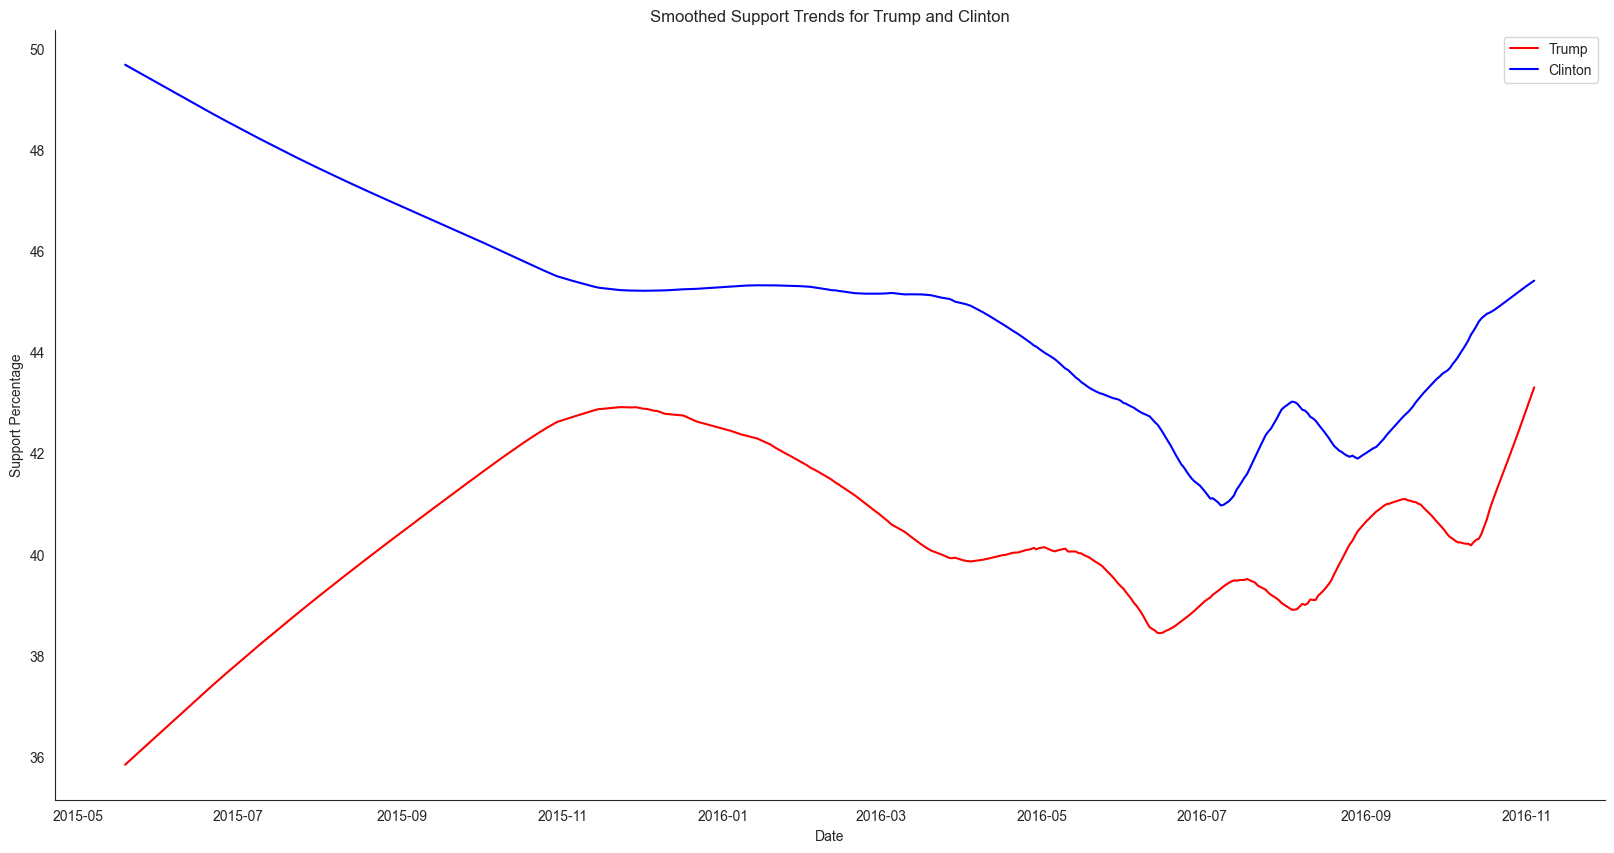

In [879]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

def plot_smooth_trends(df, smoothing_frac=0.2, rolling_window=7):
    numeric_cols = ["Trump", "Clinton"]

    df[numeric_cols] = df[numeric_cols].interpolate(method="linear")

    df["Trump_Smooth"] = df["Trump"].rolling(window=rolling_window, min_periods=1).mean()
    df["Clinton_Smooth"] = df["Clinton"].rolling(window=rolling_window, min_periods=1).mean()

    start_date_int = df["Start Date"].astype("int64") // 10**9

    trump_lowess = lowess(df["Trump_Smooth"], start_date_int, frac=smoothing_frac)
    clinton_lowess = lowess(df["Clinton_Smooth"], start_date_int, frac=smoothing_frac)

    df_trump_smooth = pd.DataFrame({"Start Date": df["Start Date"], "Trump_Smooth": trump_lowess[:, 1]})
    df_clinton_smooth = pd.DataFrame({"Start Date": df["Start Date"], "Clinton_Smooth": clinton_lowess[:, 1]})

    sns.set_style("white")

    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df_trump_smooth, x="Start Date", y="Trump_Smooth", label="Trump", color="red")
    sns.lineplot(data=df_clinton_smooth, x="Start Date", y="Clinton_Smooth", label="Clinton", color="blue")

    plt.xlabel("Date")
    plt.ylabel("Support Percentage")
    plt.title(f"Smoothed Support Trends for Trump and Clinton")
    plt.legend()

    sns.despine()

    plt.show()

plot_smooth_trends(df_clean, smoothing_frac=0.2, rolling_window=7)


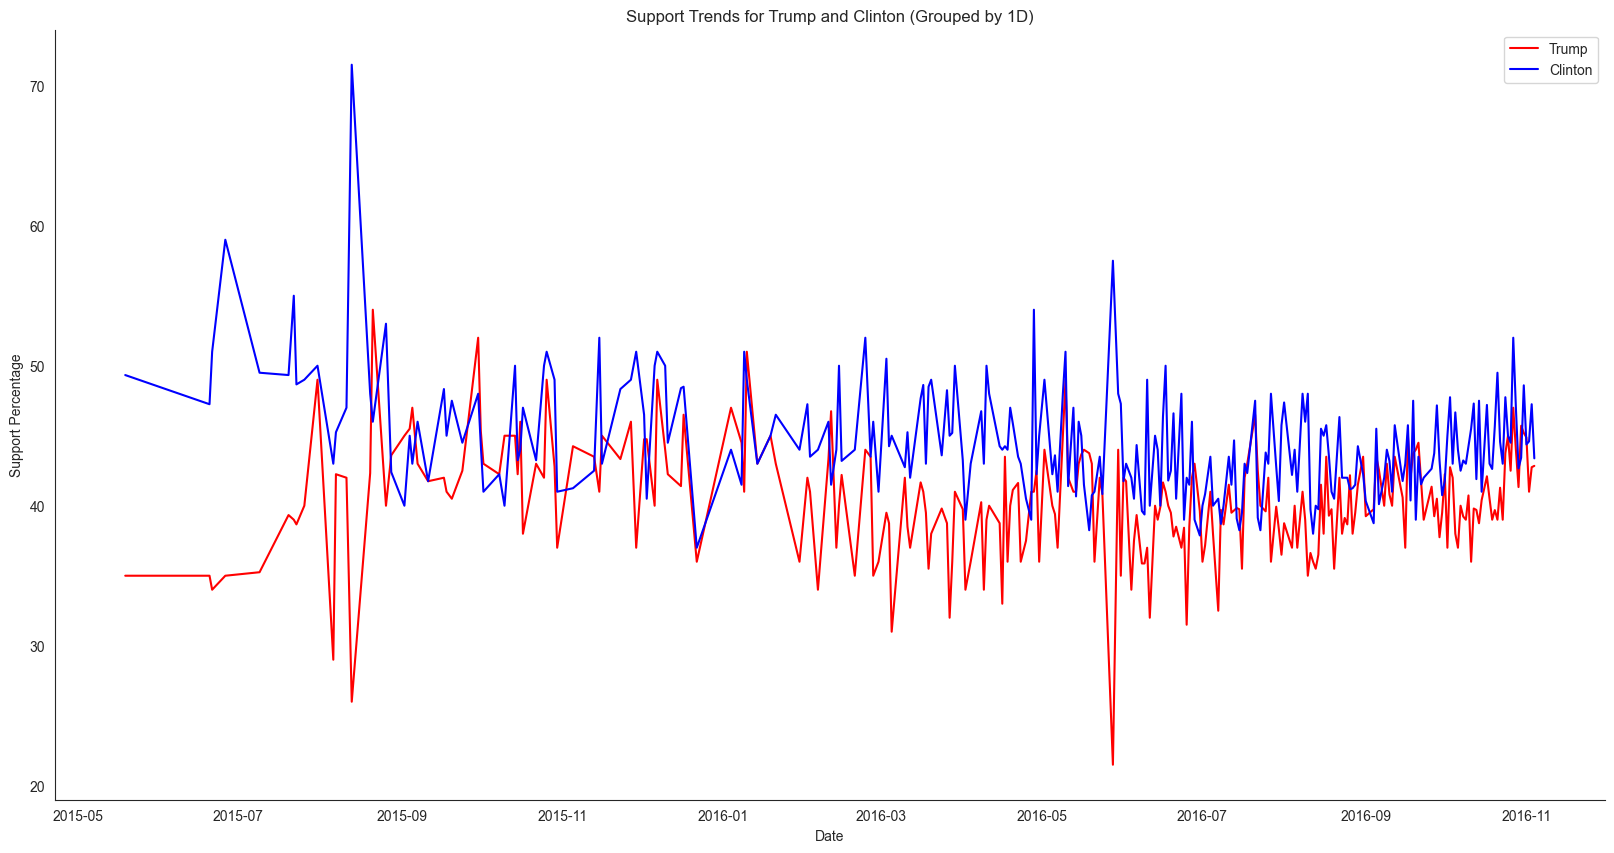

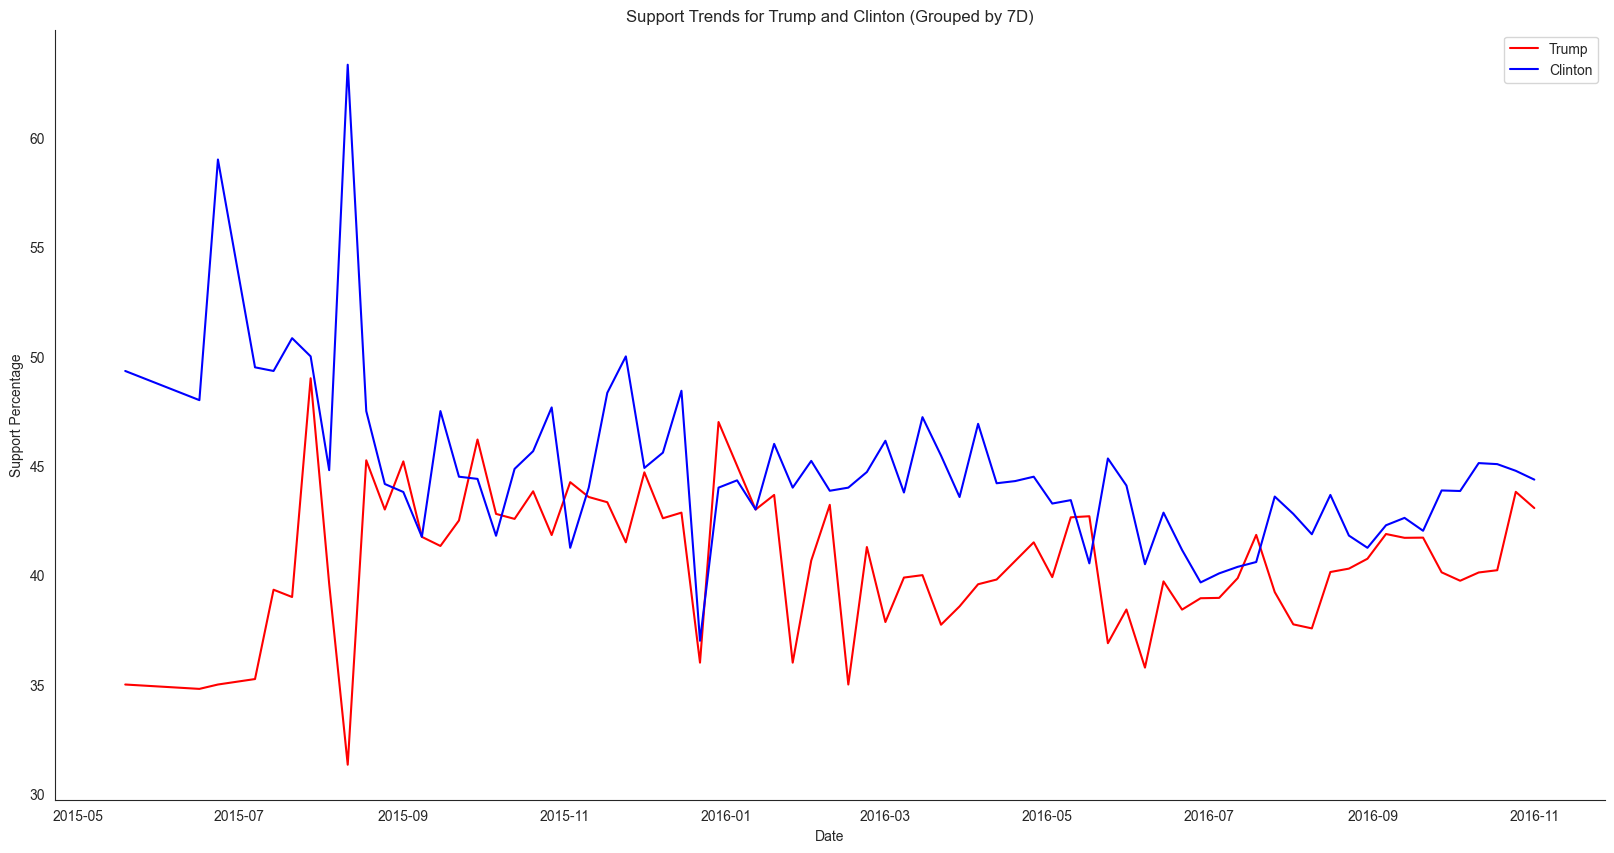

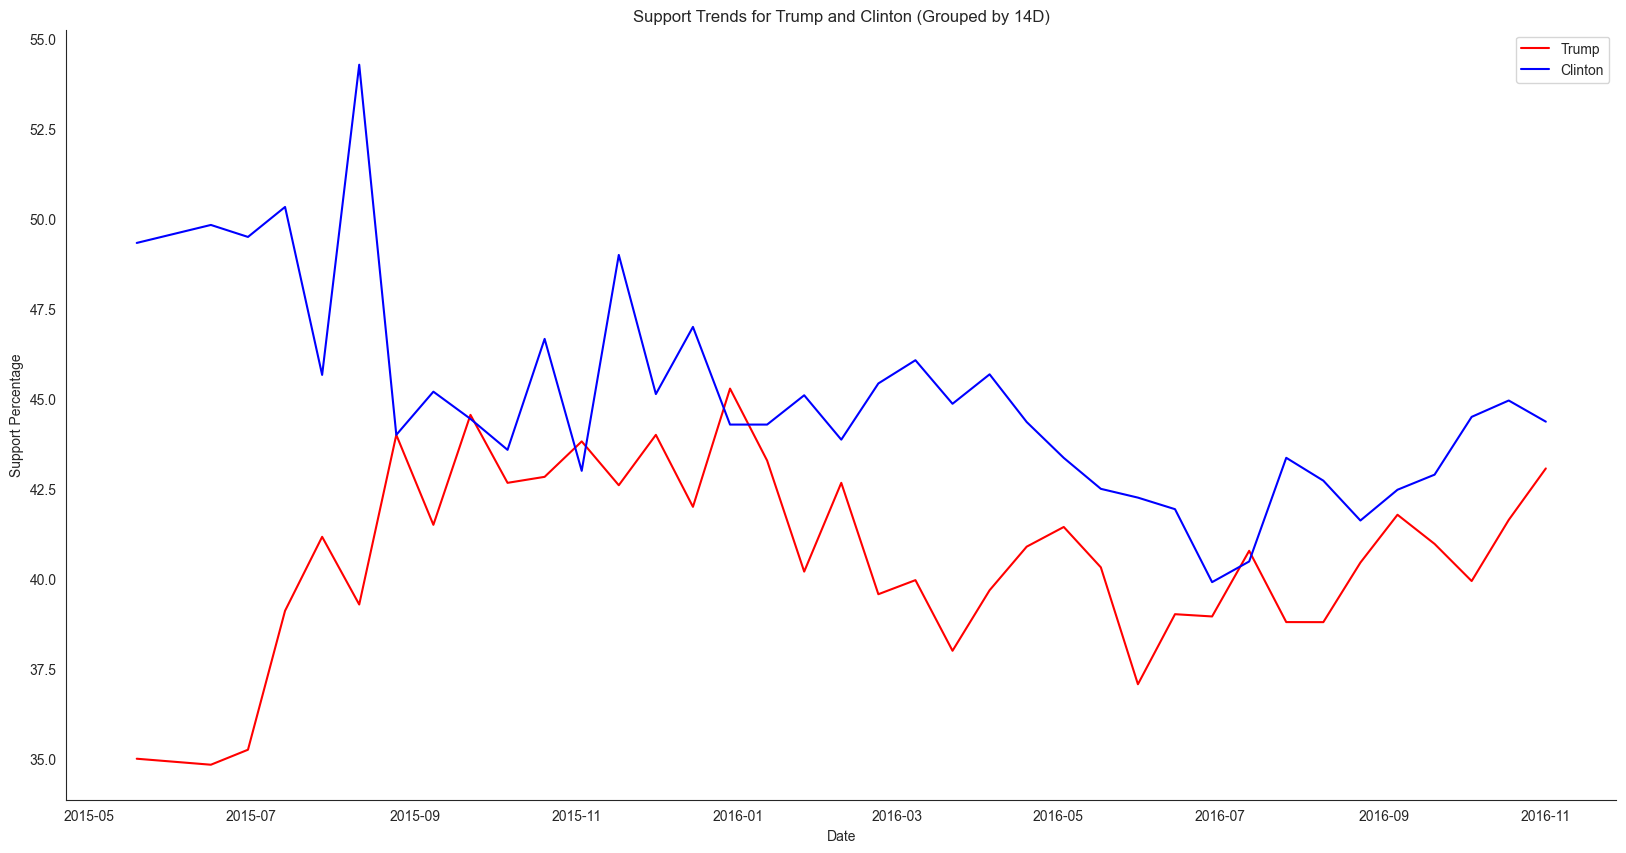

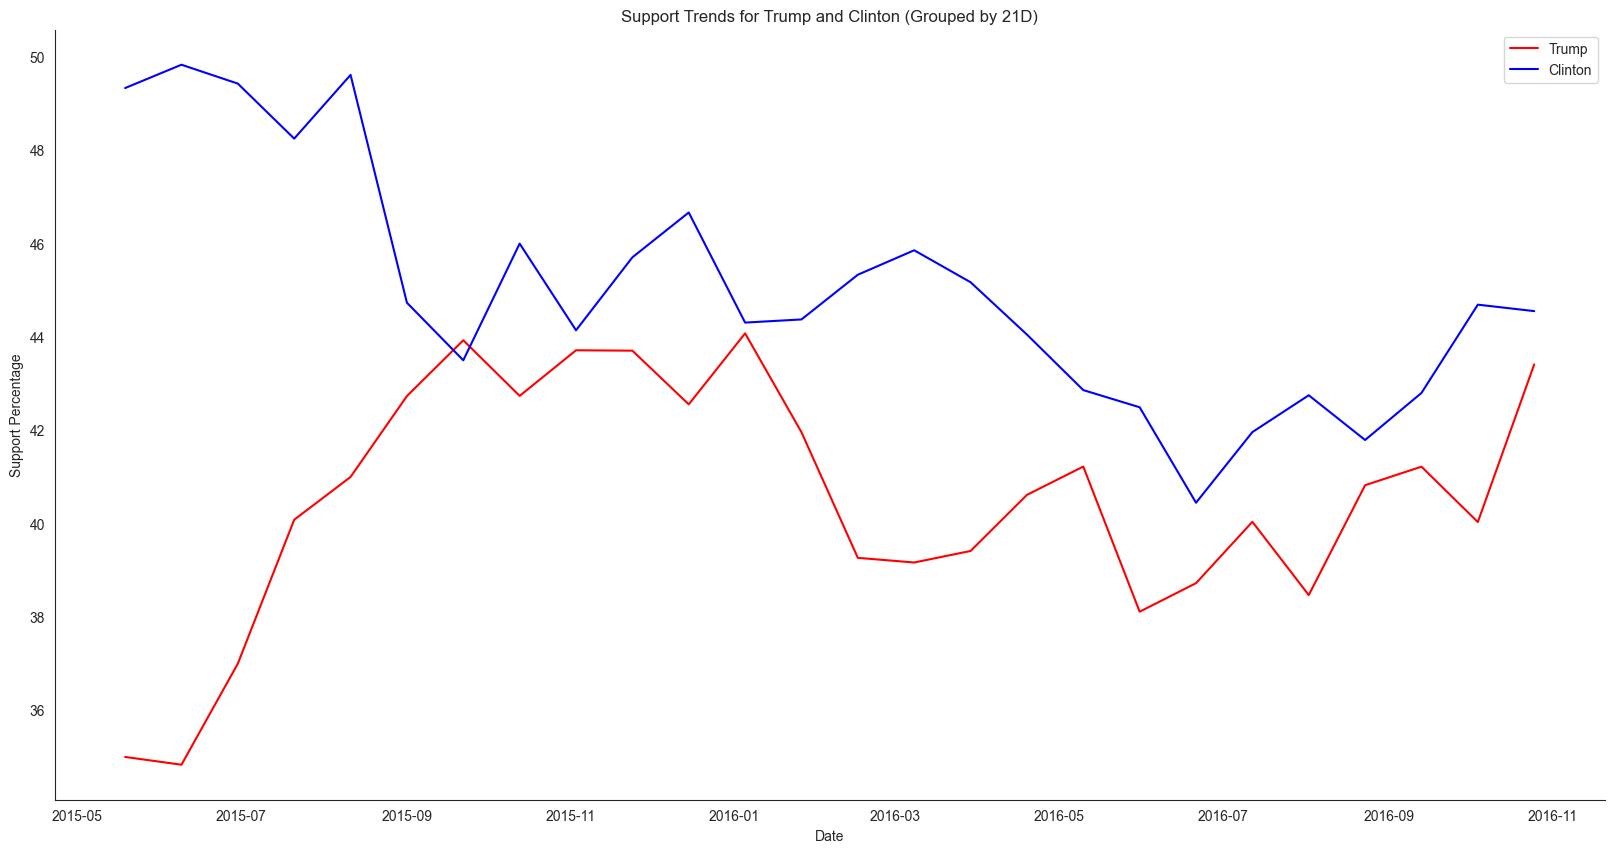

In [880]:
def plot_supporters_trend(time_bin):
    numeric_cols = ["Trump", "Clinton"]
    df_grouped = df_clean.set_index("Start Date").resample(time_bin)[numeric_cols].mean()

    sns.set_style("white")

    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df_grouped, x=df_grouped.index, y="Trump", label="Trump", color="red")
    sns.lineplot(data=df_grouped, x=df_grouped.index, y="Clinton", label="Clinton", color="blue")

    plt.xlabel("Date")
    plt.ylabel("Support Percentage")
    plt.title(f"Support Trends for Trump and Clinton (Grouped by {time_bin})")
    plt.legend()

    sns.despine()

    plt.show()

# Set the time bin size
time_bins = ["1D", "7D", "14D", "21D"]

for time_bin in time_bins:
    plot_supporters_trend(time_bin)

In [881]:
df_clean

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode,Trump_Smooth,Clinton_Smooth
1520,68.0,9.0,Quinnipiac,2015-05-19,679.0,Live Phone,68.000000,9.000000
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone,36.500000,49.000000
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone,35.000000,49.333333
1514,35.0,46.0,YouGov/Economist,2015-06-20,869.0,Internet,35.000000,48.500000
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet,34.800000,47.800000
...,...,...,...,...,...,...,...,...
14,41.0,44.0,Bloomberg/Selzer,2016-11-04,799.0,Live Phone,43.000000,43.571429
44,39.0,32.0,Politico/Morning Consult,2016-11-04,416.0,Internet,42.714286,41.714286
43,85.0,9.0,Politico/Morning Consult,2016-11-04,495.0,Internet,54.000000,30.142857
9,40.0,45.0,Lucid/The Times-Picayune,2016-11-04,931.0,Internet,47.714286,36.000000


In [882]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 1520 to 0
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Trump                   1013 non-null   float64       
 1   Clinton                 1013 non-null   float64       
 2   Pollster                1013 non-null   object        
 3   Start Date              1013 non-null   datetime64[ns]
 4   Number of Observations  1013 non-null   float64       
 5   Mode                    1013 non-null   object        
 6   Trump_Smooth            1013 non-null   float64       
 7   Clinton_Smooth          1013 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 71.2+ KB


#### Q5. Calculate the total number of voters observed by summing all poll observations in the dataset.


In [883]:
## df_clean = df_clean[df_clean["Affiliation"].isna()]

total_voters = df_clean["Number of Observations"].sum()

print(f"Total number of voters observed: {total_voters}")

Total number of voters observed: 1940931.0


#### Q6. Calculate the estimated proportion of voters favoring Trump and Clinton. Display these estimates in a table.


In [884]:
total_voters = df_clean["Number of Observations"].sum()

trump_proportion = (df_clean["Trump"] / 100 * df_clean["Number of Observations"]).sum() / total_voters
clinton_proportion = (df_clean["Clinton"] / 100 * df_clean["Number of Observations"]).sum() / total_voters

proportion_table = pd.DataFrame({
    "Candidate": ["Trump", "Clinton"],
    "Estimated Proportion": [trump_proportion, clinton_proportion]
})

print(proportion_table)



  Candidate  Estimated Proportion
0     Trump              0.405834
1   Clinton              0.456121


#### 7. Using the aggregated data, compute the 95% confidence intervals for Trump and Clinton support proportions.


In [885]:
trump_se = np.sqrt((trump_proportion * (1 - trump_proportion)) / total_voters)
clinton_se = np.sqrt((clinton_proportion * (1 - clinton_proportion)) / total_voters)

z_score = stats.norm.ppf(0.975)

trump_ci_lower = trump_proportion - z_score * trump_se
trump_ci_upper = trump_proportion + z_score * trump_se

clinton_ci_lower = clinton_proportion - z_score * clinton_se
clinton_ci_upper = clinton_proportion + z_score * clinton_se

ci_df = pd.DataFrame({
    "Candidate": ["Trump", "Clinton"],
    "Lower 95% CI": [trump_ci_lower, clinton_ci_lower],
    "Upper 95% CI": [trump_ci_upper, clinton_ci_upper]
})

print(ci_df)

  Candidate  Lower 95% CI  Upper 95% CI
0     Trump      0.405143      0.406524
1   Clinton      0.455420      0.456822


#### Q8. For illustrative purposes, assume there are only two parties, and let 𝑝 denote the proportion of voters supporting Clinton. Consequently, 1 − 𝑝 represents the proportion supporting Trump. We define the spread as the difference in support between Clinton and Trump: 𝑑 = 𝑝 − (1 − 𝑝) = 2𝑝 − 1. Using the aggregated poll data, we estimate 𝑝 as 𝑝^. Therefore, the estimated spread 𝑑 can be approximated as: 𝑑 ≈ 2𝑝^ − 1. This also implies that the standard error for the spread is twice as large as the standard error for 𝑝^. So, our confidence interval for the spread is: 𝐶𝐼 𝑓𝑜𝑟 𝑑 = (2𝑝^ − 1) ± 1. 96 × (2 × 𝑆𝐸𝑝^).
 ##### 1. Calculate the 95% confidence interval for the spread 𝑑, using the formula provided above

In [886]:
total_voters = (df_clean["Trump"]/100 * df_clean["Number of Observations"]).sum() + (df_clean["Clinton"]/100 * df_clean["Number of Observations"]).sum()

trump_proportion = (df_clean["Trump"]/100 * df_clean["Number of Observations"]).sum() / total_voters
clinton_proportion = (df_clean["Clinton"]/100 * df_clean["Number of Observations"]).sum() / total_voters

trump_se = np.sqrt((trump_proportion * (1 - trump_proportion)) / total_voters)
clinton_se = np.sqrt((clinton_proportion * (1 - clinton_proportion)) / total_voters)

spread_estimate = 2 * clinton_proportion - 1

spread_se = 2 * clinton_se

z_score = stats.norm.ppf(0.975)

spread_ci_lower = spread_estimate - z_score * spread_se
spread_ci_upper = spread_estimate + z_score * spread_se

spread_ci_df = pd.DataFrame({
    "Metric": ["Estimated Spread (d)", "Lower 95% CI", "Upper 95% CI"],
    "Value": [spread_estimate, spread_ci_lower, spread_ci_upper]
})

print(spread_ci_df)

                 Metric     Value
0  Estimated Spread (d)  0.058341
1          Lower 95% CI  0.056828
2          Upper 95% CI  0.059854


2. Conduct a hypothesis test to determine if the spread d is significantly different from zero by testing 𝐻0 : 𝑑 = 0 vs 𝐻𝑎: 𝑑 ≠ 0. Provide the test statistic and p-value.


In [887]:
spread = 0
z_test_statistic = (spread_estimate - spread) / spread_se

# Calculate p-value = p(dhat > 0.0583 or dhat < -0.0583 | d = 0) using test statistic Z

# Uses 1 - cdf(Z): The Cumulative Distribution Function (cdf) calculates P(X < Z).
# Multiplying by 2 ensures a two-tailed test.

p_value = 2 * (1 - stats.norm.cdf(abs(z_test_statistic)))

hypothesis_test_df = pd.DataFrame({
    "Metric": ["Test Statistic (Z)", "P-Value"],
    "Value": [z_test_statistic, p_value]
})

alpha = 0.05

if p_value < alpha:
    result = "Reject H0: The spread (d) is significantly different from 0."
else:
    result = "Fail to reject H0: No significant evidence that the spread (d) differs from 0."

print(hypothesis_test_df, "\n")
print(result)



               Metric      Value
0  Test Statistic (Z)  75.589467
1             P-Value   0.000000 

Reject H0: The spread (d) is significantly different from 0.
